### os.walk()

In [4]:
import os

# 현재 디렉토리 확인
current_dir = os.getcwd()
print(current_dir)

# 디렉토리 변경
os.chdir("../[Web] Portfolio")

# 폴더와 파일 탐색
for dirname, subdirs, filenames in os.walk('.'):
    print(f"탐색 중인 디렉터리: {dirname}")
    # print(f"하위 디렉터리 목록: {subdirs}")
    # print(f"파일 목록: {filenames}")
    print("-" * 30)

c:\workspace\[Web] Portfolio
탐색 중인 디렉터리: .
------------------------------
탐색 중인 디렉터리: .\.git
------------------------------
탐색 중인 디렉터리: .\.git\hooks
------------------------------
탐색 중인 디렉터리: .\.git\info
------------------------------
탐색 중인 디렉터리: .\.git\logs
------------------------------
탐색 중인 디렉터리: .\.git\logs\refs
------------------------------
탐색 중인 디렉터리: .\.git\logs\refs\heads
------------------------------
탐색 중인 디렉터리: .\.git\logs\refs\remotes
------------------------------
탐색 중인 디렉터리: .\.git\logs\refs\remotes\origin
------------------------------
탐색 중인 디렉터리: .\.git\objects
------------------------------
탐색 중인 디렉터리: .\.git\objects\01
------------------------------
탐색 중인 디렉터리: .\.git\objects\02
------------------------------
탐색 중인 디렉터리: .\.git\objects\03
------------------------------
탐색 중인 디렉터리: .\.git\objects\04
------------------------------
탐색 중인 디렉터리: .\.git\objects\05
------------------------------
탐색 중인 디렉터리: .\.git\objects\06
------------------------------
탐색 중인 디렉터리: .\.gi

In [13]:
#!pip install tensorflow
# !pip install tensorflow-gpu

### tf.io.decode_jpeg

Binary 형태의 이미지 (처음 100 바이트): b"\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\n\x07\x08\t\x08\x06\n\t\x08\t\x0c\x0b\n\x0c\x0f\x1a\x11\x0f\x0e\x0e\x0f\x1f\x16\x18\x13\x1a%!'&$!$#).;2),8,#$3F48=?BCB(1HMH@M;AB?\xff\xdb\x00C\x01\x0b\x0c\x0c\x0f\r\x0f"

 이미지 확인하기


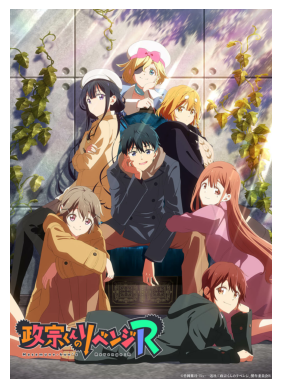

In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt

# 이미지 파일을 바이트 형태로 불러오기
with open("revengeR.jpg", "rb") as f:
    image_data = f.read()

print(f'Binary 형태의 이미지 (처음 100 바이트): {image_data[:100]}')
# TensorFlow를 사용해 JPEG 이미지 디코딩
decoded_image = tf.io.decode_jpeg(image_data, channels=3)  # channels=3은 RGB 채널을 의미함

print('\n 이미지 확인하기')
plt.imshow(decoded_image)
plt.axis('off')
plt.show()

### tf.io.FixedLenFeature

In [11]:
import tensorflow as tf

# 데이터를 TFRecord 형태로 저장하기
with tf.io.TFRecordWriter("test.tfrecord") as writer:
    feature = {
        'data': tf.train.Feature(int64_list=tf.train.Int64List(value=[1, 2, 3, 4, 5])),
    }
    example_proto = tf.train.Example(features=tf.train.Features(feature=feature))
    writer.write(example_proto.SerializeToString())

# TFRecord 파일 읽기
dataset = tf.data.TFRecordDataset("test.tfrecord")

# 각 record를 어떻게 파싱할지 지정
feature_description = {
    'data': tf.io.FixedLenFeature([5], tf.int64),
}

def _parse_function(example_proto):
    # parse the input `tf.train.Example` proto using the dictionary above
    return tf.io.parse_single_example(example_proto, feature_description)

parsed_dataset = dataset.map(_parse_function)

# 결과 출력
for parsed_record in parsed_dataset:
    print(parsed_record['data'])

tf.Tensor([1 2 3 4 5], shape=(5,), dtype=int64)
